In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../scripts')
from util import load_dataframe

Load the trade data -- looking at **2016 only**.

In [3]:
trade = pd.read_excel('../../uk-steel-trade/raw_data/uktradeinfo_20180813_tidied.xls')['HS4'].dropna()
codes = pd.DataFrame({'code_name': {
    x[:4]: x[7:]
    for x in trade
}})

In [28]:
table = pd.read_csv('../../uk-steel-trade/checking_table.csv')
df = table.query('sector_code in ["13"] and direction == "import" and year == 2016') \
.set_index('HS4') \
.sort_values('mass_iron')[['sector_code', 'HS description', 'stage', 'mass_iron']]
df

,sector_code,HS description,stage,mass_iron
HS4,,,,
8401,13,"Nuclear reactors; fuel elements ""cartridges"", non-irradiated, for nuclear reactors; machinery and apparatus for isotopic separation; parts thereof",final,0.051395
8405,13,"Producer gas or water gas generators, with or without their purifiers; acetylene gas generators and similar water process gas generators, with or without their purifiers; parts thereof (excl. coke ovens, electrolytic p.",final,1.117243
8406,13,Steam turbines and other vapour turbines; parts thereof,component,3.111679
8417,13,"Industrial or laboratory furnaces and ovens, non-electric, incl. incinerators (excl. drying ovens and ovens for cracking operations)",final,3.146609
8454,13,"Converters, ladles, ingot moulds and casting machines of a kind used in metallurgy or in metal foundries (excl. metal powder presses); parts thereof",final,3.590254
8455,13,Metal-rolling mills and rolls therefor; parts of metal-rolling mills,final,4.298743
8404,13,"Auxiliary plant for use with boilers of heading 8402 or 8403, e.g. economizers, superheaters, soot removers and gas recoverers; condensers for steam or other vapour power units; parts thereof",final,4.309265
8514,13,"Industrial or laboratory electric furnaces and ovens, incl. those functioning by induction or dielectric loss; other industrial or laboratory equipment for the heat treatment of materials by induction or dielectric los.",final,5.166106
8416,13,"Furnace burners for liquid fuel, for pulverised solid fuel or for gas; mechanical stokers, incl. their mechanical grates, mechanical ash dischargers and similar appliances; parts thereof",final,5.301706


In [23]:
df.groupby(['sector_code', 'stage']).sum()

mass_iron
sector_code stage                 
15a         component   730.623960
            final      1518.660440
15b         component   712.451102
            final       866.108131

In [ ]:
table = pd.read_csv('../../uk-steel-trade/checking_table.csv')


In [4]:
# Load the flows from the datapackage
flows = load_dataframe('../../uk-steel-trade/datapackage.json', 'flows')
flows['mass'] = flows['mass'].astype(float)  # XXX this is annoying

# Load the allocation table and category iron contents
alloc = pd.read_csv('../../uk-steel-trade/scripts/hs4_allocations.csv', usecols=['HS4', 'sector_code'], index_col='HS4')
cats = pd.read_csv('../../uk-steel-trade/scripts/steel_contents.csv', index_col=0)

# Join the allocation table and iron contents data
df = flows \
    .query('direction == "export" and year == 2016') \
    .join(alloc, on='HS4') \
    .join(cats, on='sector_code') \
    .join(codes, on='HS4')

# Convert kg to kt, calculate iron content
df['mass'] /= 1e6
df['mass_iron'] = df['mass'] * df['iron_content']

In [5]:
flows

,HS4,direction,mass,year
0,73--,export,5.276533e+07,2015
1,73--,export,5.918477e+07,2016
2,73--,export,5.982041e+07,2017
3,73--,import,3.132035e+08,2015
4,73--,import,3.673546e+08,2016
5,73--,import,4.417137e+08,2017
6,7301,export,2.161475e+08,1996
7,7301,export,1.674731e+08,1997
8,7301,export,1.621680e+08,1998
9,7301,export,1.260700e+08,1999


These HS codes are unallocated (only showing the top 20 by mass)

In [77]:
unalloc = df[pd.isnull(df.sector_code)].groupby('HS4') \
    .agg({'mass': 'sum', 'code_name': 'first'}) \
    .sort_values('mass', ascending=False)
unalloc.head(20)

,mass,code_name
HS4,,
None,27982.092645,NaN
7306,238.959183,"Tubes, pipes and hollow profiles ""e.g., open s..."
7305,208.455946,"Tubes and pipes, having circular cross-section..."
7302,106.124487,Railway or tramway track construction material...
8544,91.052359,"Insulated ""incl. enamelled or anodised"" wire, ..."
7304,71.730727,"Tubes, pipes and hollow profiles, seamless, of..."
9506,39.147450,Articles and equipment for general physical ex...
7307,32.479362,"Tube or pipe fittings ""e.g. couplings, elbows,..."
8548,28.724849,"Waste and scrap of primary cells, primary batt..."


Now, for each ISSB sector code, pick out the main contributions to exports:

In [18]:
pd.set_option('display.max_colwidth', 250)

'10: Metal working toolsand engineering tools (71% iron)'

,mass_iron,code_name
HS4,,
8481,62.788651,"Taps, cocks, valves and similar appliances for pipes, boiler shells, tanks, vats or the like, incl. pressure-reducing valves and thermostatically controlled valves; parts thereof"
8482,16.878530,Ball or roller bearings (excl. steel balls of heading 7326); parts thereof
8462,11.697545,"Machine tools, incl. presses, for working metal by forging, hammering or die-stamping; machine tools, incl. presses, for working metal by bending, folding, straightening, flattening, shearing, punching or notching; pre."
8467,8.348172,"Tools for working in the hand, pneumatic, hydraulic or with self-contained electric or non-electric motor; parts thereof"
8457,8.228577,"Machining centres, unit construction machines ""single station"" and multi-station transfer machines for working metal"
8458,6.900528,"Lathes, incl. turning centres, for removing metal"
8466,5.060847,"Parts and accessories suitable for use solely or principally with the machines of headings 8456 to 8465, incl. work or tool holders, self-opening dieheads, dividing heads and other special attachments for the machines,."
8461,4.746959,"Machine tools for planing, shaping, slotting, broaching, gear cutting, gear grinding or gear finishing, sawing, cutting-off and other machine tools working by removing metal, sintered metal carbides or cermets, n.e.s."
8465,3.318473,"Machine tools, incl. machines for nailing, stapling, glueing or otherwise assembling, for working wood, cork, bone, hard rubber, hard plastics or similar hard materials (excl. machines for working in the hand)"


'11: Construction, earth moving and mechanical handling equipment (85% iron)'

,mass_iron,code_name
HS4,,
8429,279.268098,"Self-propelled bulldozers, angledozers, graders, levellers, scrapers, mechanical shovels, excavators, shovel loaders, tamping machines and roadrollers"
8427,142.345959,Fork-lift trucks; other works trucks fitted with lifting or handling equipment (excl. straddle carriers and works trucks fitted with a crane)
8431,110.638753,"Parts suitable for use solely or principally with the machinery of heading 8425 to 8430, n.e.s."
8428,59.636208,"Lifting, handling, loading or unloading machinery, e.g. lifts, escalators, conveyors, teleferics (excl. pulley tackle and hoists, winches and capstans, jacks, cranes of all kinds, mobile lifting frames and straddle car."
8426,15.724976,"Ships' derricks; cranes, incl. cable cranes (excl. wheel-mounted cranes and vehicle cranes for railways); mobile lifting frames, straddle carriers and works trucks fitted with a crane"
8430,9.709517,"Moving, grading, levelling, scraping, excavating, tamping, compacting, extracting or boring machinery, for earth, minerals or ores; pile-drivers and pile-extractors; snowploughs and snowblowers (excl. those mounted on ."
8438,7.020201,"Machinery, not specified or included elsewhere in this chapter, for the industrial preparation or manufacture of food or drink (other than machinery for the extraction or preparation of animal or fixed vegetable fats o."
8709,3.407076,"Works trucks, self-propelled, not fitted with lifting or handling equipment, of the type used in factories, warehouses, dock areas or airports for short distance transport of goods; tractors of the type used on railway."


'12: Other mechanical engineering (71% iron)'

,mass_iron,code_name
HS4,,
8413,186.684702,"Pumps for liquids, whether or not fitted with a measuring device (excl. ceramic pumps and secretion aspirating pumps for medical use and medical pumps carried on or implanted in the body); liquid elevators (excl. pumps."
8408,156.034857,"Compression-ignition internal combustion piston engine ""diesel or semi-diesel engine"""
8407,97.160716,Spark-ignition reciprocating or rotary internal combustion piston engine
8409,69.952136,Parts suitable for use solely or principally with internal combustion piston engine of heading 8407 or 8408
8443,45.873426,"Printing machinery used for printing by means of plates, cylinders and other printing components of heading 8442 (excl. hectograph or stencil duplicating machines, addressing machines and other office printing machines."
8483,45.537933,"Transmission shafts, incl. camshafts and crankshafts, and cranks; bearing housings and plain shaft bearings for machines; gears and gearing; ball or roller screws, gear boxes and other speed changers, incl. torque conv."
8414,41.730432,"Air or vacuum pumps (excl. gas compound elevators and pneumatic elevators and conveyors); air or other gas compressors and fans; ventilating or recycling hoods incorporating a fan, whether or not fitted with filters; p."
7322,15.932342,"Radiators for central heating, non-electrically heated, and parts thereof, of iron or steel; air heaters and hot-air distributors, incl. distributors which can also distribute fresh or conditioned air, non-electrically."
8411,12.387896,"Turbojets, turbopropellers and other gas turbines"


'13: Industrial and process plant (100% iron)'

,mass_iron,code_name
HS4,,
8421,90.554647,"Centrifuges, incl. centrifugal dryers (excl. those for isotope separation); filtering or purifying machinery and apparatus, for liquids or gases; parts thereof (excl. artificial kidneys)"
84--,58.068711,HS2 Below Threshold Trade
8419,32.145686,"Machinery, plant or laboratory equipment whether or not electrically heated (excl. furnaces, ovens and other equipment of heading 8514), for the treatment of materials by a process involving a change of temperature suc."
8455,17.385910,Metal-rolling mills and rolls therefor; parts of metal-rolling mills
8514,5.592844,"Industrial or laboratory electric furnaces and ovens, incl. those functioning by induction or dielectric loss; other industrial or laboratory equipment for the heat treatment of materials by induction or dielectric los."
8417,5.085633,"Industrial or laboratory furnaces and ovens, non-electric, incl. incinerators (excl. drying ovens and ovens for cracking operations)"
8402,3.955802,Steam or other vapour generating boilers (excl. central heating hot water boilers capable also of producing low pressure steam); superheated water boilers; parts thereof
8406,2.564094,Steam turbines and other vapour turbines; parts thereof
8405,1.384359,"Producer gas or water gas generators, with or without their purifiers; acetylene gas generators and similar water process gas generators, with or without their purifiers; parts thereof (excl. coke ovens, electrolytic p."


'14: Construction and fabricated constructional steelwork (100% iron)'

,mass_iron,code_name
HS4,,
7308,224.498891,"Structures and parts of structures ""e.g., bridges and bridge-sections, lock-gates, towers, lattice masts, roofs, roofing frameworks, doors and windows and their frames and thresholds for doors, shutters, balustrades, p."
73--,59.184766,HS2 Below Threshold Trade
7314,46.170028,"Cloth, incl. endless bands, grill, netting and fencing, of iron or steel wire, expanded metal of iron or steel (excl. woven products of metal fibres of a kind used for cladding, lining or similar purposes)"
7312,33.365012,"Stranded wire, ropes, cables, plaited bands, slings and the like, of iron or steel (excl. electrically insulated products and twisted fencing wire and barbed wire)"
7315,8.020428,"Chain and parts thereof, or iron or steel (excl. watch chains, necklace chains and the like, cutting and saw chain, skid chain, scraper chain for conveyors, toothed chain for textile machinery and the like, safety devi."
7313,3.722767,"Barbed wire of iron or steel; twisted hoop or single flat wire, barbed or not, and loosely twisted double wire, of a kind used for fencing, of iron or steel"
7316,1.130325,"Anchors, grapnels and parts thereof, of iron or steel"


'15a: Motor vehicles: BIW (87% iron)'

,mass_iron,code_name
HS4,,
8707,7.989382,"Bodies, incl. cabs, for tractors, motor vehicles for the transport of ten or more persons, motor cars and other motor vehicles principally designed for the transport of persons, motor vehicles for the transport of good."


'15b: Motor vehicles: drivetrain and trimmings (44% iron)'

,mass_iron,code_name
HS4,,
8708,338.548329,"Parts and accessories for tractors, motor vehicles for the transport of ten or more persons, motor cars and other motor vehicles principally designed for the transport of persons, motor vehicles for the transport of go."
8706,0.785484,"Chassis fitted with engines, for tractors, motor vehicles for the transport of ten or more persons, motor cars and other motor vehicles principally designed for the transport of persons, motor vehicles for the transpor."


'16: Other transport (58% iron)'

,mass_iron,code_name
HS4,,
8703,1380.679669,"Motor cars and other motor vehicles principally designed for the transport of <10 persons, incl. station wagons and racing cars (excl. motor vehicles of heading 8702)"
8716,71.422087,"Trailers and semi-trailers; other vehicles, not mechanically propelled (excl. railway and tramway vehicles); parts thereof, n.e.s."
8602,52.729738,Rail locomotives (excl. those powered from an external source of electricity or by accumulators); locomotive tenders
8908,33.728856,Vessels and other floating structures for breaking up
87--,19.624117,HS2 Below Threshold Trade
8601,13.877896,Rail locomotives powered from an external source of electricity or by electric accumulators
8907,11.441928,"Rafts, tanks, coffer-dams, landing stages, buoys, beacons and other floating structures (excl. vessels of heading 8901 to 8906 and floating structures for breaking up)"
8606,10.577279,Railway or tramway goods vans and wagons (excl. self-propelled and luggage vans and post office coaches)
8903,9.117955,Yachts and other vessels for pleasure or sports; rowing boats and canoes


'20: Other UK consumers (60% iron)'

,mass_iron,code_name
HS4,,
9102,0.772260,"Wrist-watches, pocket-watches and other watches, incl. stop-watches (excl. of precious metal or of metal clad with precious metal)"
9105,0.494920,"Clocks (excl. wrist-watches, pocket-watches and other watches of heading 9101 or 9102, clocks with watch movements of heading 9103, and instrument panel clocks and the like of heading 9104)"
91--,0.109399,HS2 Below Threshold Trade
9103,0.034040,"Clocks with watch movements (excl. wrist-watches, pocket-watches and other watches of heading 9101 or 9102, and instrument panel clocks and the like of heading 9104)"
9104,0.019668,"Instrument panel clocks and clocks of a similar type for vehicles, aircraft, vessels and other vehicles"
9114,0.018146,"Clock or watch parts, n.e.s."


'4: Bolts, nuts, rivets, screws, etc. (100% iron)'

,mass_iron,code_name
HS4,,
7318,60.783242,"Screws, bolts, nuts, coach screws, screw hooks, rivets, cotters, cotter pins, washers, incl. spring washers, and similar articles, of iron or steel (excl. lag screws, stoppers, plugs and the like, threaded)"
7320,19.123962,"Springs and leaves for springs, of iron or steel (excl. clock and watch springs, springs for sticks and handles of umbrellas or parasols, shock absorbers and torque rod or torsion bar springs of Section 17)"
7317,3.023156,"Nails, tacks, drawing pins, corrugated nails, staples and similar articles of iron or steel, whether or not with heads of other material (excl. such articles with heads of copper and staples in strips)"
7319,0.210722,"Sewing needles, knitting needles, bodkins, crochet hoods, embroidery stilettos and similar articles, for use in the hand, of iron or steel; safety pins and other pins of iron or steel, n.e.s."


'5: Hand tools, cutlery, instrument engineering (85% iron)'

,mass_iron,code_name
HS4,,
8309,24.064491,"Stoppers, caps and lids, incl. crown corks, screw caps and pouring stoppers, capsules for bottles, threaded bungs, bung covers, seals and other packing accessories, of base metal"
8205,8.852353,"Hand tools, incl. glaziers' diamonds, of base metal, n.e.s.; blowlamps and the like; vices, clamps and the like (other than accessories for and parts of machine-tools or water-jet cutting machines); anvils; portable fo."
8301,8.523772,"Padlocks and locks ""key, combination or electrically operated"", of base metal; clasps and frames with clasps, incorporating locks, of base metal; keys for any of the foregoing articles, of base metal"
8207,8.350670,"Tools, interchangeable, for hand tools, whether or not power-operated, or for machine tools ""e.g. for pressing, stamping, punching, tapping, threading, drilling, boring, broaching, milling, turning or screw driving"", i."
8308,4.875067,"Clasps, frames with clasps, buckles, buckle-clasps, hooks, eyes, eyelets and the like, of base metal, of a kind used for clothing, footwear, awnings, handbags, travel goods or other made-up articles, tubular or bifurca."
8423,4.617181,"Weighing machinery, incl. weight-operated counting or checking machines (excl. balances of a sensitivity of 5 cg or better); weighing machine weights of all kinds; parts thereof"
8212,3.639144,"Non-electric razors and razor blades of base metal, incl. razor blade blanks in strips"
8306,3.411207,"Bells, gongs and the like, non-electric, of base metal (excl. musical instruments); statuettes and other ornaments, of base metal (excl. works of art, collectors' pieces and antiques); photograph, picture or similar fr."
82--,2.808560,HS2 Below Threshold Trade


'6: Packaging and industrial and domestic hollow-ware (100% iron)'

,mass_iron,code_name
HS4,,
7310,43.791710,"Tanks, casks, drums, cans, boxes and similar containers, of iron or steel, for any material ""other than compressed or liquefied gas"", of a capacity of <= 300 l, not fitted with mechanical or thermal equipment, whether ."
7309,21.230407,"Reservoirs, tanks, vats and similar containers, of iron or steel, for any material ""other than compressed or liquefied gas"", of a capacity of > 300 l, not fitted with mechanical or thermal equipment, whether or not lin."
8609,8.196688,"Containers, incl. containers for the transport of fluids, specially designed and equipped for carriage by one or more modes of transport"
8403,7.937359,"Central heating boilers, non-electric; parts thereof (excl. vapour generating boilers and superheated water boilers of heading 8402)"
7311,7.865558,"Containers of iron or steel, for compressed or liquefied gas (excl. containers specifically constructed or equipped for one or more types of transport)"
8404,3.115391,"Auxiliary plant for use with boilers of heading 8402 or 8403, e.g. economizers, superheaters, soot removers and gas recoverers; condensers for steam or other vapour power units; parts thereof"
8480,1.902110,"Moulding boxes for metal foundry; mould bases; moulding patterns; moulds for metal (other than ingot moulds), metal carbides, glass, mineral materials, rubber or plastics (excl. moulds of graphite or other carbons, cer."


'7: Other metal goods (including furnitue, doors, windows, non-electric domestic appliances, and springs) (60% iron)'

,mass_iron,code_name
HS4,,
7326,77.958942,"Articles of iron or steel, n.e.s. (excl. cast articles)"
9503,31.128858,"Tricycles, scooters, pedal cars and similar wheeled toys; dolls' carriages; dolls; other toys; reduced-size ""scale"" recreational models, working or not; puzzles of all kinds"
8302,22.022442,"Base metal mountings, fittings and similar articles suitable for furniture, doors, staircases, windows, blinds, coachwork, saddlery, trunks, chests, caskets or the like; base metal hat-racks, hat-pegs, brackets and sim."
7325,20.345373,"Articles of iron or steel, cast, n.e.s."
7321,8.131407,"Stoves, ranges, grates, cookers, incl. those with subsidiary boilers for central heating, barbecues, braziers, gas rings, plate warmers and similar non-electric domestic appliances, and parts thereof of iron or steel (."
7323,6.349262,"Table, kitchen or other household articles, and parts thereof, of iron or steel; iron or steel wool; pot scourers and scouring or polishing pads, gloves and the like, of iron or steel (excl. cans, boxes and similar con."
95--,4.535009,HS2 Below Threshold Trade
83--,3.509668,HS2 Below Threshold Trade
7324,1.619935,"Sanitary ware, and parts thereof, of iron or steel (excl. cans, boxes and similar containers of heading 7310, small wall cabinets for medical supplies or toiletries and other furniture of chapter 94, and fittings)"


'8: Electrical engineering, including elec. domestic appliances (30% iron)'

,mass_iron,code_name
HS4,,
8474,39.682974,"Machinery for sorting, screening, separating, washing, crushing, grinding, mixing or kneading earth, stone, ores or other mineral substances, in solid, incl. powder or paste, form; machinery for agglomerating, shaping ."
8502,25.390154,Electric generating sets and rotary converters
8507,23.544543,"Electric accumulators, incl. separators therefor, whether or not square or rectangular; parts thereof (excl. spent and those of unhardened rubber or textiles)"
8471,18.936800,"Automatic data-processing machines and units thereof; magnetic or optical readers, machines for transcribing data onto data media in coded form and machines for processing such data, n.e.s."
8479,17.427244,"Machines and mechanical appliances having individual functions, not specified or included elsewhere in this chapter; parts thereof"
8501,15.459462,Electric motors and generators (excl. generating sets)
8536,15.192154,"Electrical apparatus for switching or protecting electrical circuits, or for making connections to or in electrical circuits, e.g., switches, relays, fuses, surge suppressors, plugs, sockets, lamp holders and junction ."
8531,10.456424,"Electric sound or visual signalling apparatus, e.g. bells, sirens, indicator panels, burglar or fire alarms (excl. those for cycles, motor vehicles and traffic signalling); parts thereof"
8516,9.611242,"Electric instantaneous or storage water heaters and immersion heaters; electric space-heating apparatus and soil-heating apparatus; electro-thermic hairdressing apparatus, e.g. hairdryers, hair curlers and curling tong."


'9: Agricultural machinery (85% iron)'

,mass_iron,code_name
HS4,,
8701,165.021260,Tractors (other than tractors of heading 8709)
8433,41.863319,"Harvesting or threshing machinery, incl. straw or fodder balers; grass or hay mowers; machines for cleaning, sorting or grading eggs, fruit or other agricultural produce; parts thereof (other than machines for cleaning."
8432,14.507725,"Agricultural, horticultural or forestry machinery for soil preparation or cultivation (excl. sprayers and dusters); lawn or sports-ground rollers; parts thereof"
8436,12.766694,"Agricultural, horticultural, forestry, poultry-keeping or bee-keeping machinery, incl. germination plant fitted with mechanical or thermal equipment; poultry incubators and brooders; parts thereof"
8437,3.841479,"Machines for cleaning, sorting or grading seed, grain or dried leguminous vegetables; machinery used in the milling industry or for the working of cereals or dried leguminous vegetables (excl. farm-type machinery, heat."
8434,1.526262,"Milking machines and dairy machinery (excl. refrigerating or heat treatment equipment, cream separators, clarifying centrifuges, filter presses and other filtering equipment); parts thereof"
8435,0.130371,"Presses, crushers and similar machinery used in the manufacture of wine, cider, fruit juices or similar beverages (excl. machinery for the treatment of these beverages, incl. centrifuges, filter presses, other filterin."


<Figure size 432x288 with 0 Axes>

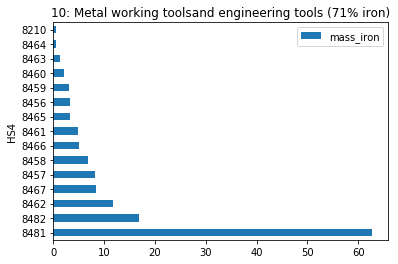

<Figure size 432x288 with 0 Axes>

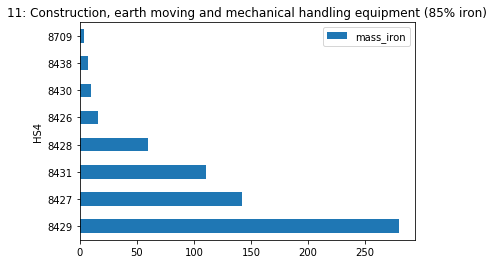

<Figure size 432x288 with 0 Axes>

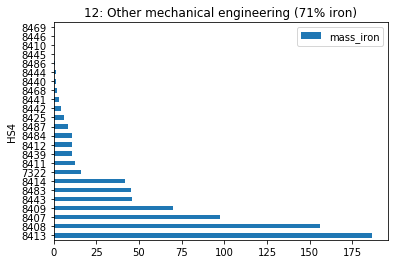

<Figure size 432x288 with 0 Axes>

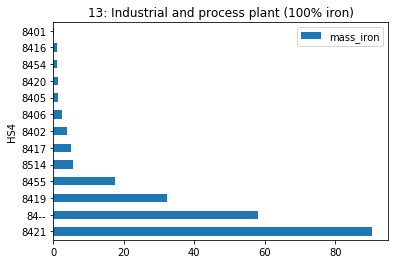

<Figure size 432x288 with 0 Axes>

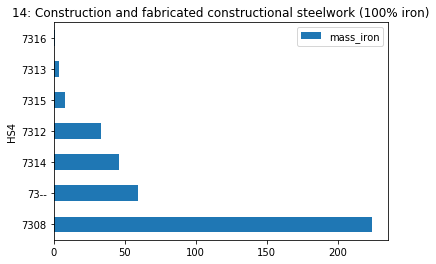

<Figure size 432x288 with 0 Axes>

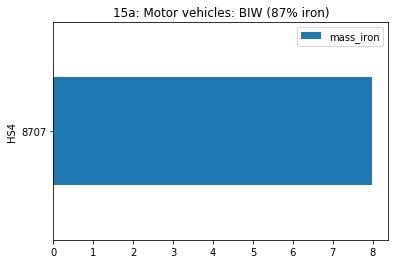

<Figure size 432x288 with 0 Axes>

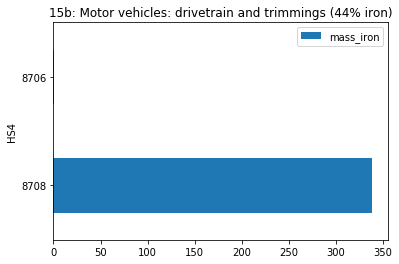

<Figure size 432x288 with 0 Axes>

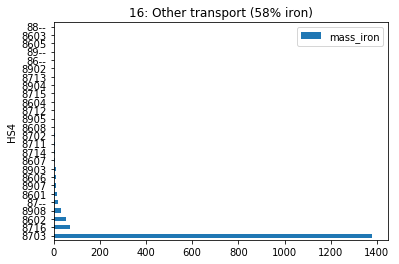

<Figure size 432x288 with 0 Axes>

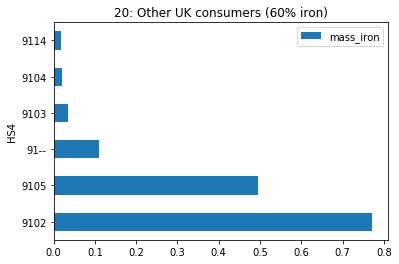

<Figure size 432x288 with 0 Axes>

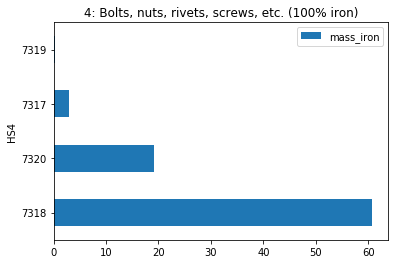

<Figure size 432x288 with 0 Axes>

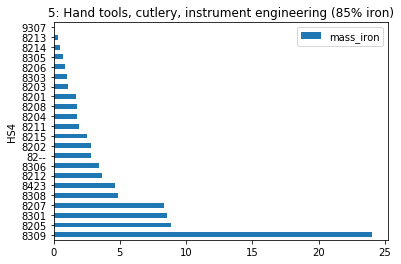

<Figure size 432x288 with 0 Axes>

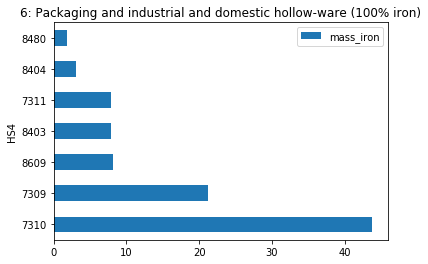

<Figure size 432x288 with 0 Axes>

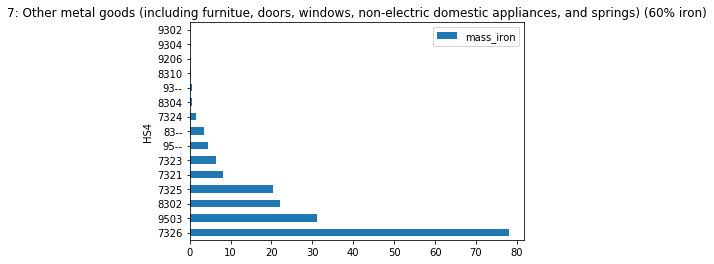

<Figure size 432x288 with 0 Axes>

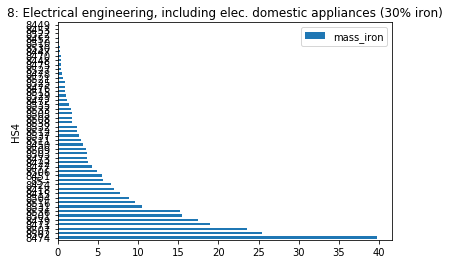

<Figure size 432x288 with 0 Axes>

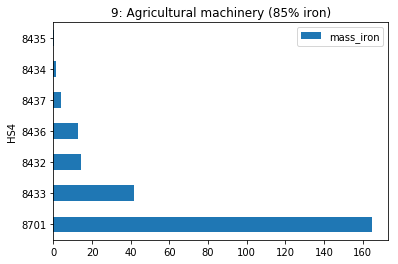

In [86]:
from IPython.display import display

for code, dd in df.groupby('sector_code'):
    name = dd['sector_name'].iloc[0]
    iron_content = dd['iron_content'].iloc[0]
    bars = dd.set_index('HS4')[['mass_iron', 'code_name']].sort_values('mass_iron', ascending=False)
    display('%s: %s (%.0f%% iron)' % (code, name, iron_content * 100))
    display(bars)
    plt.figure()
    bars.plot.barh()
    plt.title('%s: %s (%.0f%% iron)' % (code, name, iron_content * 100))

These are the sectors causing the large imbalances:

In [55]:
flows = pd.read_csv('../data/flows.csv')
imbalance = flows.query('source == "imbalance"').set_index('material')['value'].sort_values()
imbalance

material
13      50.2
5       65.1
10     132.2
9      238.8
12     423.1
11     517.5
16    1557.6
Name: value, dtype: float64

Text(0.5, 1.0, 'Imbalance of ISSB sectors')

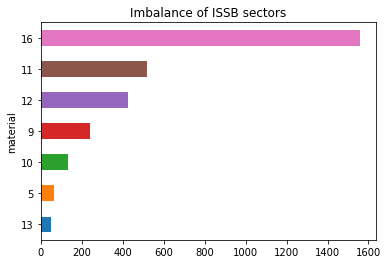

In [57]:
imbalance.plot.barh()
plt.title('Imbalance of ISSB sectors')